In [ ]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



#suspress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#1. Source the data. Create dataframes from SQL statements. Join the tables to enrich the records with additional columns.
##I connected to the SQLite database, read and extracted data from 3 tables. Then I merged these tables to create a single a DataFrame with all house data + crime + tax rate.

In [ ]:
import sqlite3

conn = sqlite3.connect("/content/TechPro-DataScience-Midseason-Dataset.db")

df_houses= pd.read_sql_query("SELECT * FROM houses", conn)
df_cities= pd.read_sql_query("SELECT * FROM cities", conn).rename(columns={"index": "City"})
df_energy_classes= pd.read_sql_query("SELECT * FROM energy_classes", conn).rename(columns={"index": "Energy Class"})

conn.close()


# Merge houses with cities on 'City'
df = pd.merge(df_houses, df_cities, on="City", how="left")

# Merge the result with energy_classes on 'Energy Class'
df = pd.merge(df, df_energy_classes, on="Energy Class", how="left")

# Show the first few rows of the merged dataframe
df.head()

,uuid,Area,Bedrooms,Bathrooms,Floor,Year Built,City,Energy Class,Price,Crime,Tax Rate
0,bbbd183f-51cb-4cea-a4bf-390ebba9d0a9,86.0,3.0,NaN,NaN,1979.0,Athens,A,112000.0,-1.625270,0.05
1,14ed91ba-d349-443c-9731-4ac87be90957,49.0,1.0,1.0,-1.0,2003.0,Lamia,C,39000.0,0.343085,0.10
2,e8757848-45b9-42a1-b719-fe3c7010ed10,106.0,5.0,5.0,3.0,1956.0,Larissa,E,78000.0,-0.689243,0.19
3,25703f63-e6bb-4f80-9df4-c3b58c66d6b3,95.0,3.0,3.0,1.0,1957.0,Athens,A,106000.0,-1.625270,0.05
4,bf1e5866-085b-4142-8e9a-cf0c71245675,55.0,3.0,4.0,-1.0,2012.0,Athens,A,99000.0,-1.625270,0.05


In [ ]:
df = df.drop(columns=["Floor","uuid"])


In [ ]:
# Show the first few rows of the merged dataframe
df.head(10)

,Area,Bedrooms,Bathrooms,Year Built,City,Energy Class,Price,Crime,Tax Rate
0,86.0,3.0,NaN,1979.0,Athens,A,112000.0,-1.625270,0.05
1,49.0,1.0,1.0,2003.0,Lamia,C,39000.0,0.343085,0.10
2,106.0,5.0,5.0,1956.0,Larissa,E,78000.0,-0.689243,0.19
3,95.0,3.0,3.0,1957.0,Athens,A,106000.0,-1.625270,0.05
4,55.0,3.0,4.0,2012.0,Athens,A,99000.0,-1.625270,0.05
5,117.0,5.0,5.0,2012.0,Thessaloniki,E,103000.0,0.453732,0.19
6,109.0,5.0,5.0,2013.0,Lamia,B,80000.0,0.343085,0.07
7,109.0,4.0,3.0,1979.0,Thessaloniki,E,70000.0,0.453732,0.19
8,58.0,3.0,3.0,1959.0,Athens,E,82000.0,-1.625270,0.19
9,37.0,2.0,1.0,2018.0,Athens,E,97000.0,-1.625270,0.19


In [ ]:
#2. Pre-process the data. Handle missing values, cast string values to their proper types, encode categorical variables, normalize the columns, etc
## Explore the DataFrame, Handle missing values,search for duplicates,  cast string values to their proper types, encode categorical variables, search for outliers , normalize the columns (?)

In [ ]:
df.shape

(10000, 9)

In [ ]:
df.nunique()

,0
Area,85
Bedrooms,5
Bathrooms,5
Year Built,74
City,7
Energy Class,5
Price,173
Crime,7
Tax Rate,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          9724 non-null   float64
 1   Bedrooms      9687 non-null   float64
 2   Bathrooms     9702 non-null   float64
 3   Year Built    10000 non-null  object 
 4   City          9684 non-null   object 
 5   Energy Class  9683 non-null   object 
 6   Price         9713 non-null   float64
 7   Crime         9684 non-null   float64
 8   Tax Rate      9683 non-null   float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


In [ ]:
# View missing data

df.isna().sum()

,0
Area,276
Bedrooms,313
Bathrooms,298
Year Built,0
City,316
Energy Class,317
Price,287
Crime,316
Tax Rate,317


In [ ]:
#  Drop rows missing critical fields or info that aren't so important and Fill less critical ones

df = df.dropna(subset=["Area","Price"])
df["Bedrooms"]=df["Bedrooms"].fillna(df["Bedrooms"].median())
df["Bathrooms"]=df["Bathrooms"].fillna(df["Bathrooms"].median())
df["Crime"] = df["Crime"].fillna(df["Crime"].median())
df["Tax Rate"] = df["Tax Rate"].fillna(df["Tax Rate"].median())
df["Year Built"] = df["Year Built"].fillna(df["Year Built"].median())
df["City"] = df["City"].fillna(df["City"].mode()[0])
df["Energy Class"] = df["Energy Class"].fillna(df["Energy Class"].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9443 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          9443 non-null   int64  
 1   Bedrooms      9443 non-null   int64  
 2   Bathrooms     9443 non-null   int64  
 3   Year Built    9443 non-null   int64  
 4   City          9443 non-null   object 
 5   Energy Class  9443 non-null   object 
 6   Price         9443 non-null   int64  
 7   Crime         9443 non-null   float64
 8   Tax Rate      9443 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 737.7+ KB


In [ ]:
df.shape
df.isna().sum()

,0
Area,0
Bedrooms,0
Bathrooms,0
Year Built,0
City,0
Energy Class,0
Price,0
Crime,0
Tax Rate,0


In [ ]:
# how many duplicates rows appears
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.dtypes

,0
Area,int64
Bedrooms,int64
Bathrooms,int64
Year Built,int64
City,object
Energy Class,object
Price,int64
Crime,float64
Tax Rate,float64


In [ ]:
# Ensure Categorical and Numerical  columns has the right type

df["City"] = df["City"].astype(str)
df["Energy Class"] = df["Energy Class"].astype(str)
df["Bedrooms"] = df["Bedrooms"].astype(int)
df["Bathrooms"] = df["Bathrooms"].astype(int)
df["Price"] = df["Price"].astype(int)
df["Area"] = df["Area"].astype(int)
df["Year Built"] = df["Year Built"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9443 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          9443 non-null   int64  
 1   Bedrooms      9443 non-null   int64  
 2   Bathrooms     9443 non-null   int64  
 3   Year Built    9443 non-null   int64  
 4   City          9443 non-null   object 
 5   Energy Class  9443 non-null   object 
 6   Price         9443 non-null   int64  
 7   Crime         9443 non-null   float64
 8   Tax Rate      9443 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 737.7+ KB


In [ ]:
df.head(10)

,Area,Bedrooms,Bathrooms,Year Built,City,Energy Class,Price,Crime,Tax Rate
0,86,3,3,1979,Athens,A,112000,-1.625270,0.05
1,49,1,1,2003,Lamia,C,39000,0.343085,0.10
2,106,5,5,1956,Larissa,E,78000,-0.689243,0.19
3,95,3,3,1957,Athens,A,106000,-1.625270,0.05
4,55,3,4,2012,Athens,A,99000,-1.625270,0.05
5,117,5,5,2012,Thessaloniki,E,103000,0.453732,0.19
6,109,5,5,2013,Lamia,B,80000,0.343085,0.07
7,109,4,3,1979,Thessaloniki,E,70000,0.453732,0.19
8,58,3,3,1959,Athens,E,82000,-1.625270,0.19
9,37,2,1,2018,Athens,E,97000,-1.625270,0.19


In [ ]:
#encode categorical variables
#df["City"].value_counts()
#df["Energy Class"].value_counts()

,count
Energy Class,
A,2180
D,1853
B,1827
E,1802
C,1781


In [ ]:
def convert_city_to_int(City):
    if City == 'Athens':
        return 1
    elif City == 'Thessaloniki':
        return 2
    elif City == 'Crete':
        return 3
    elif City == 'Thebes':
        return 4
    elif City == 'Larissa':
        return 5
    elif City == 'Trikala':
        return 6
    elif City == 'Lamia':
        return 7
    else:
        return 0

df["City"] = df["City"].apply(convert_city_to_int)

In [ ]:
def convert_energy_to_int(Energy_Class):
    if Energy_Class == 'A':
        return 1
    elif Energy_Class == 'B':
        return 2
    elif Energy_Class == 'C':
        return 3
    elif Energy_Class == 'D':
        return 4
    elif Energy_Class == 'E':
        return 5
    elif Energy_Class == 'F':
        return 6
    else:
        return 0

df["Energy Class"] = df["Energy Class"].apply(convert_energy_to_int)



In [ ]:
df.head(10)


,Area,Bedrooms,Bathrooms,Year Built,City,Energy Class,Price,Crime,Tax Rate
0,86,3,3,1979,1,1,112000,-1.625270,0.05
1,49,1,1,2003,7,3,39000,0.343085,0.10
2,106,5,5,1956,5,5,78000,-0.689243,0.19
3,95,3,3,1957,1,1,106000,-1.625270,0.05
4,55,3,4,2012,1,1,99000,-1.625270,0.05
5,117,5,5,2012,2,5,103000,0.453732,0.19
6,109,5,5,2013,7,2,80000,0.343085,0.07
7,109,4,3,1979,2,5,70000,0.453732,0.19
8,58,3,3,1959,1,5,82000,-1.625270,0.19
9,37,2,1,2018,1,5,97000,-1.625270,0.19


<Axes: ylabel='Frequency'>

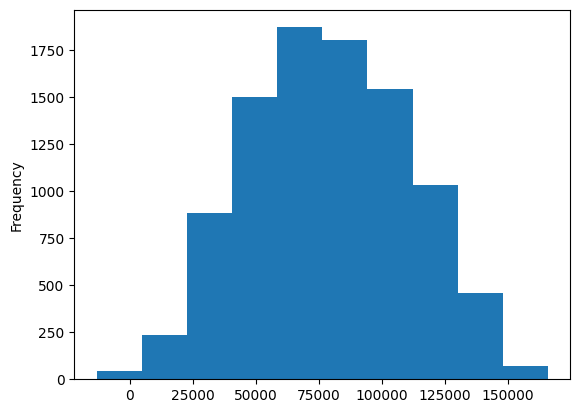

In [ ]:
#check for outliers using plots
df["Price"].plot(kind="hist")

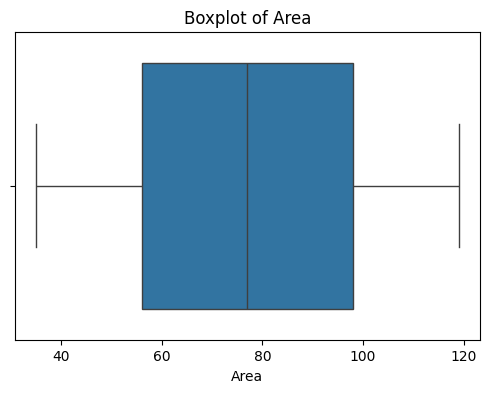

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Area
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Area"])
plt.title("Boxplot of Area")
plt.show()

In [ ]:
df.describe()

,Area,Bedrooms,Bathrooms,Year Built,City,Energy Class,Price,Crime,Tax Rate
count,9443.000000,9443.000000,9443.000000,9443.000000,9443.000000,9443.000000,9443.000000,9443.000000,9443.000000
mean,76.917717,3.073705,3.320555,1985.923965,2.528857,2.922694,78979.985174,-0.383763,0.109249
std,24.402018,1.273319,1.311344,20.786764,1.813331,1.438993,31968.733430,1.149742,0.049468
min,35.000000,1.000000,1.000000,1950.000000,1.000000,1.000000,-13000.000000,-1.625270,0.050000
25%,56.000000,2.000000,2.000000,1968.000000,1.000000,2.000000,55000.000000,-1.625270,0.070000
50%,77.000000,3.000000,3.000000,1986.000000,2.000000,3.000000,78000.000000,-0.689243,0.100000
75%,98.000000,4.000000,5.000000,2004.000000,3.000000,4.000000,103000.000000,0.453732,0.140000
max,119.000000,5.000000,5.000000,2022.000000,7.000000,5.000000,166000.000000,1.472769,0.190000


In [ ]:
#3. Perform an analysis on the dataset showing how each of the 8 features affects the final price.

In [ ]:
df.corr()

,Area,Bedrooms,Bathrooms,Year Built,City,Energy Class,Price,Crime,Tax Rate
Area,1.000000,0.894623,0.762968,0.017669,-0.006305,-0.001575,0.494116,-0.023120,-0.000252
Bedrooms,0.894623,1.000000,0.821896,0.014269,-0.005004,0.000509,0.456800,-0.019932,0.002644
Bathrooms,0.762968,0.821896,1.000000,0.006097,-0.009926,-0.002245,0.394961,-0.024630,0.001311
Year Built,0.017669,0.014269,0.006097,1.000000,-0.002738,0.005766,0.296166,-0.002921,0.001600
City,-0.006305,-0.005004,-0.009926,-0.002738,1.000000,0.006334,-0.433409,0.363930,0.003341
Energy Class,-0.001575,0.000509,-0.002245,0.005766,0.006334,1.000000,-0.171645,-0.001365,0.964630
Price,0.494116,0.456800,0.394961,0.296166,-0.433409,-0.171645,1.000000,-0.717159,-0.181870
Crime,-0.023120,-0.019932,-0.024630,-0.002921,0.363930,-0.001365,-0.717159,1.000000,-0.003989
Tax Rate,-0.000252,0.002644,0.001311,0.001600,0.003341,0.964630,-0.181870,-0.003989,1.000000


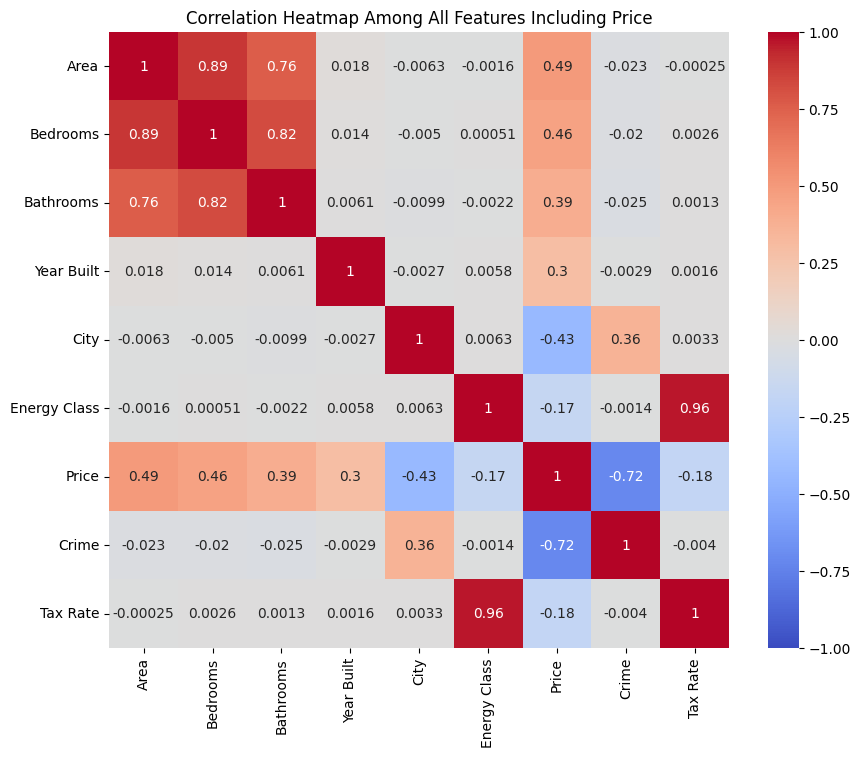

In [ ]:
# Plot heatmap
# Full correlation heatmap focused on all features' relationship with Price
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap Among All Features Including Price")
plt.show()

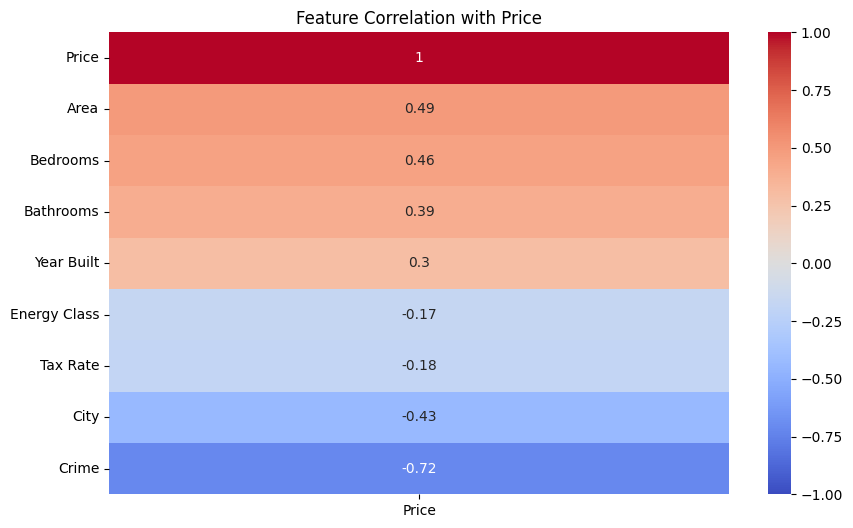

,Price
Price,1.000000
Area,0.494116
Bedrooms,0.456800
Bathrooms,0.394961
Year Built,0.296166
Energy Class,-0.171645
Tax Rate,-0.181870
City,-0.433409
Crime,-0.717159


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
cor = df.corr(numeric_only=True)

# Plot the heatmap of correlation with respect to Price
plt.figure(figsize=(10, 6))
sns.heatmap(cor[["Price"]].sort_values(by="Price", ascending=False), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation with Price")
plt.show()

# Show sorted correlations as a reference
cor["Price"].sort_values(ascending=False)

In [ ]:
#4. Train a linear regression model to predict the price according to the rest of the features.


  RMSE: €10,172.76
  R²: 0.9025


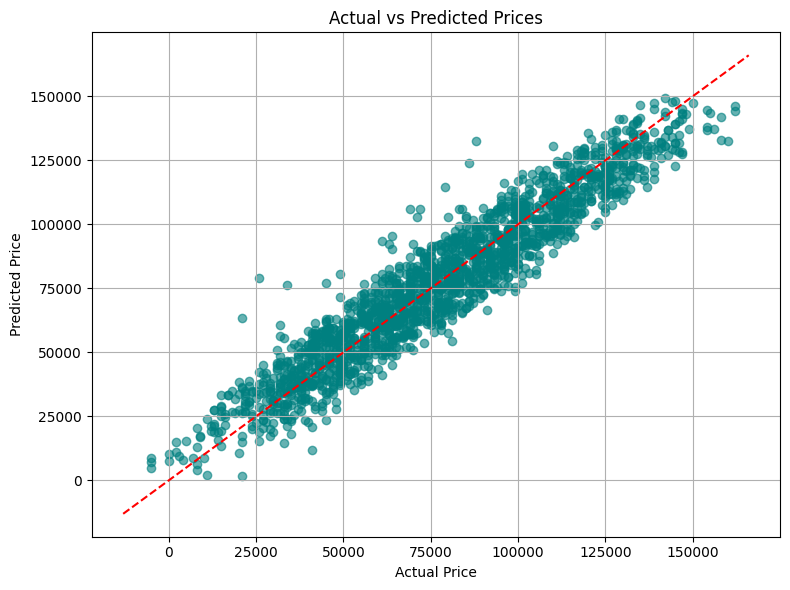

In [ ]:


# Define features and target
X = df.drop("Price", axis=1)
y = df["Price"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)


# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n  RMSE: €{rmse:,.2f}")
print(f"  R²: {r2:.4f}")

# Optional: Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#5. Evaluate the regression model using RMSE.

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#rmse_f = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)



print("-------")
print(f"📏 Mean Squared Error (MSE): {mse:,.2f}")
print(f"📉 Mean Absolute Error (MAE): {mae:,.2f}")
print(f"📐 Root Mean Squared Error (RMSE): {rmse:,.2f} €")
print(f"📈 R-squared (R²): {r2:.4f}")

-------
📏 Mean Squared Error (MSE): 103,485,119.97
📉 Mean Absolute Error (MAE): 8,283.08
📐 Root Mean Squared Error (RMSE): 10,172.76 €
📈 R-squared (R²): 0.9025


In [ ]:
#! test my model

In [ ]:
# Predict using the trained model
y_pred = model.predict(X_test)

# Compare predicted vs actual
comparison_df = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})
print(comparison_df.head(10))


   Actual Price  Predicted Price
0         10000      8920.267873
1         98000     85233.838452
2         55000     47469.477295
3        110000    105867.104813
4         95000    102455.023020
5        117000    106283.289498
6        108000     95151.422621
7         81000     87061.785288
8         24000     25204.258554
9         19000     26257.150140


In [ ]:
#6. Perform 10-fold cross-validation to the model.
###10-Fold Cross-Validation is a method to evaluate how well your model will generalize to unseen data.
###You get 10 evaluation scores (e.g., RMSE), which you can average for a more reliable estimate of your model's performance.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error

#rmse_scorer = make_scorer(mean_squared_error)
def rmse(y_test, y_pred):
    #return mean_squared_error(y_test, y_pred, squared=False)
    return np.sqrt(np.mean((y_test - y_pred) ** 2))

rmse_scorer = make_scorer(rmse)

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=12)
model = LinearRegression()

# Perform cross-validation and get RMSE scores
rmse_scores = cross_val_score(model, X, y, scoring=rmse_scorer, cv=kf)

# Report results
print("🔟 10-Fold Cross-Validation RMSE Scores (Euros):")
print(np.round(rmse_scores, 2))
print(f"\n📊 Average RMSE: {rmse_scores.mean():,.2f}€")


🔟 10-Fold Cross-Validation RMSE Scores (Euros):
[10291.49 10043.93 10500.8  10150.06 10701.32 10234.08 10321.75 10478.33
 10724.82 10599.15]

📊 Average RMSE: 10,404.57€


In [ ]:
#This shows the model has good generalization and isn’t overfitting to specific parts of the dataset.

In [ ]:
##Normalize or scale features, If You Want to Improve (later)


In [ ]:
#7. Train a DecisionTree regression model to predict the price according to the rest of the features.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree
dt_model = DecisionTreeRegressor( random_state=12)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"\n Decision Tree RMSE: {rmse_dt:,.2f}€")
print(f" Decision Tree R²: {r2_dt:.4f}")


 Decision Tree RMSE: 15,008.01€
 Decision Tree R²: 0.7877


In [ ]:
#8. Evaluate the regression model using RMSE and compare it with the linear regression

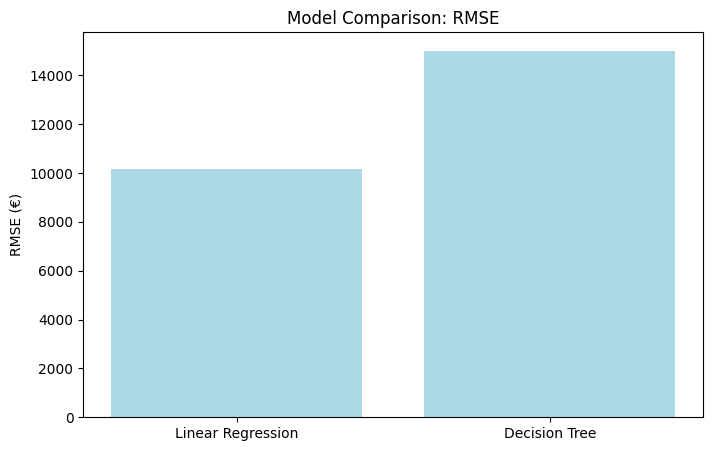

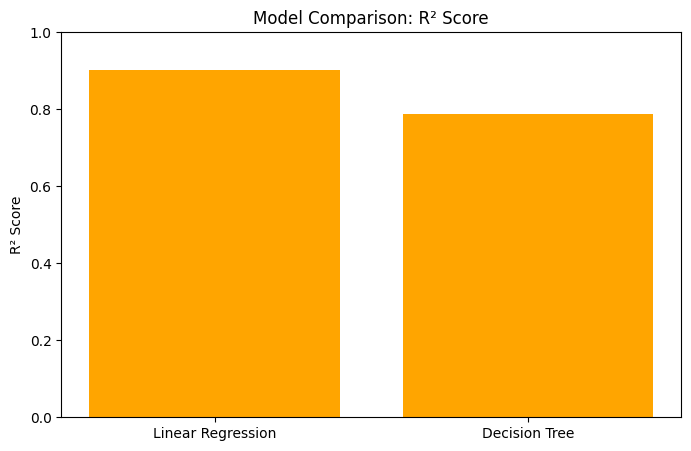

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Linear Regression', 'Decision Tree']
rmse = [10172.76, 15008.01]
r2 = [0.9025, 0.7877]

# Plot
plt.figure(figsize=(8, 5))

# RMSE
plt.bar(models, rmse, color='lightblue', label='RMSE (€)')


plt.ylabel("RMSE (€)")
plt.title("Model Comparison: RMSE")
plt.show()

# R²
plt.figure(figsize=(8, 5))
plt.bar(models, r2, color='orange', label='R² Score')


plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.title("Model Comparison: R² Score")
plt.show()

In [ ]:
"""
✅ Your Linear Regression Model Results
 RMSE: €10,172.76

→ On average, your model’s predictions are off by about 10K€.
That’s quite low for real estate pricing — very good!

📈 R²: 0.9025
→ Your model explains 90.25% of the variance in housing prices.
That’s a strong fit — especially for a simple linear model.

💬 What does this mean in context?
Your linear model performs even better than the Decision Tree, which had:

RMSE ≈ 15,008.01€

R² ≈ 0.79



✅ This might suggest:

Relationships in your dataset are fairly linear

There's not much overfitting, since the performance is solid on the test set

Simpler models like Linear Regression might be ideal for this data (at least at this stage)


------

Linear Regression performs better overall.

The Decision Tree model might be overfitting or not capturing general patterns as well.

Trees tend to fit noise unless tuned properly (e.g., with max_depth, min_samples_leaf).
"""

In [ ]:
#9. Try out different settings for the decission tree (`max_depth`, `min_samples_split`) to reduce overfitting

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree
dt_model = DecisionTreeRegressor( random_state=12)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"\n Decision Tree RMSE: €{rmse_dt:,.2f}")
print(f" Decision Tree R²: {r2_dt:.4f}")


 Decision Tree RMSE: €15,008.01
 Decision Tree R²: 0.7877


In [ ]:
# Train Decision Tree No2
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=30, random_state=12)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"\n Decision Tree RMSE: €{rmse_dt:,.2f}")
print(f" Decision Tree R²: {r2_dt:.4f}")


 Decision Tree RMSE: €11,676.61
 Decision Tree R²: 0.8715


In [ ]:
# Settings to test
max_depth_values = [3, 5, 10, 15, None]
min_samples_split_values = [5, 15, 35, 50]

# Store results
results = []

for max_depth in max_depth_values:
    for min_split in min_samples_split_values:
        model = DecisionTreeRegressor(max_depth=max_depth,
                                      min_samples_split=min_split,
                                      random_state=12)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        results.append({
            'max_depth': max_depth if max_depth is not None else "None",
            'min_samples_split': min_split,
            'RMSE': rmse,
            'R2': r2
        })

df_results = pd.DataFrame(results)

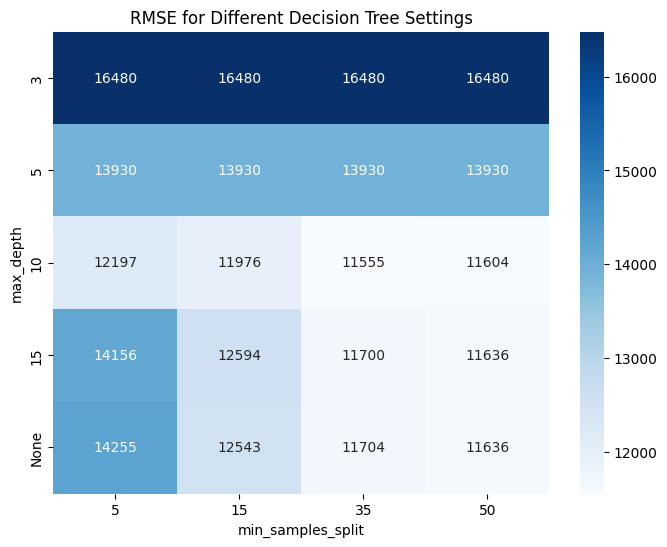

In [ ]:
# Pivot the RMSE results to prepare for heatmap
pivot = df_results.pivot(index='max_depth', columns='min_samples_split', values='RMSE')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("RMSE for Different Decision Tree Settings")
plt.ylabel("max_depth")
plt.xlabel("min_samples_split")
plt.show()

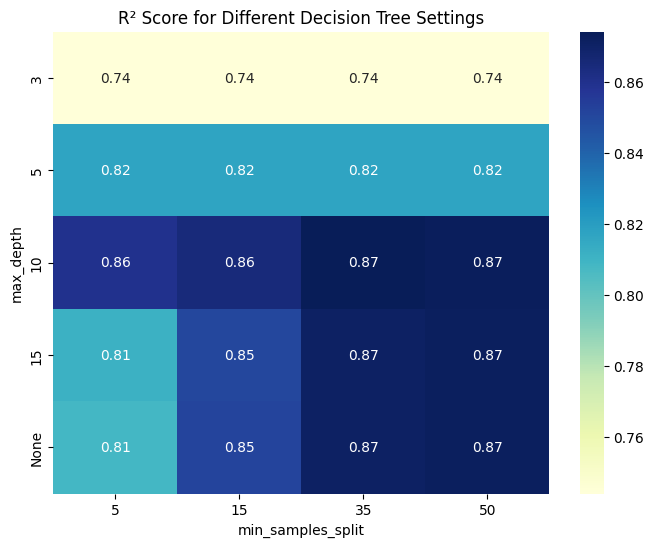

In [ ]:
# Pivot the R² results to prepare for heatmap
pivot_r2 = df_results.pivot(index='max_depth', columns='min_samples_split', values='R2')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_r2, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("R² Score for Different Decision Tree Settings")
plt.ylabel("max_depth")
plt.xlabel("min_samples_split")
plt.show()
